In [44]:
# Imports
import json
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [61]:
# Load files
def load_probs(path):
    with open(path, "r") as _file:
        probs = json.load(_file)
    return probs

tiny_mnli_path = "/home/meissner/shortcut-pruning/data/weak_models/tinybert/mnli/tiny-mnli-"
undertrain_mnli_path = "/home/meissner/shortcut-pruning/data/weak_models/undertrained/mnli/undertrain-mnli-"
epochs_comp_path = "/home/meissner/shortcut-pruning/data/weak_models/undertrained/mnli/confidence_exp/epoch-"
tiny_mnlis = [load_probs(tiny_mnli_path + "1" + str(i) + ".json") for i in range(5)]
undertrain_mnlis = [load_probs(undertrain_mnli_path + "1" + str(i) + ".json") for i in range(5)]
undertrain_epochs_comp = [load_probs(epochs_comp_path + str(i) + ".json") for i in range(1,6)]

In [20]:
list(tiny_mnlis[0].items())[:5]

[('0', [0.768073558807373, 0.17574362456798553, 0.056182861328125]),
 ('1', [0.8410807251930237, 0.08569326996803284, 0.07322598248720169]),
 ('2', [0.1369360387325287, 0.665156900882721, 0.1979069858789444]),
 ('3', [0.8453270196914673, 0.07444250583648682, 0.08023039251565933]),
 ('4', [0.8367674350738525, 0.10277853161096573, 0.060453951358795166])]

In [17]:
list(tiny_mnlis[0].values())[:5]

[[0.768073558807373, 0.17574362456798553, 0.056182861328125],
 [0.8410807251930237, 0.08569326996803284, 0.07322598248720169],
 [0.1369360387325287, 0.665156900882721, 0.1979069858789444],
 [0.8453270196914673, 0.07444250583648682, 0.08023039251565933],
 [0.8367674350738525, 0.10277853161096573, 0.060453951358795166]]

In [42]:
tiny_arrays = [np.array(list(element.values())) for element in tiny_mnlis]
under_arrays = [np.array(list(element.values())) for element in undertrain_mnlis]

In [32]:
tiny_arrays[0][:5]

array([[0.76807356, 0.17574362, 0.05618286],
       [0.84108073, 0.08569327, 0.07322598],
       [0.13693604, 0.6651569 , 0.19790699],
       [0.84532702, 0.07444251, 0.08023039],
       [0.83676744, 0.10277853, 0.06045395]])

In [47]:
# Compare average entropy of undertrain vs tiny
tiny_entropies = [np.apply_along_axis(entropy, axis=1, arr=tiny_array) for tiny_array in tiny_arrays]
tiny_entropies = [np.mean(tiny_entropy) for tiny_entropy in tiny_entropies]

In [48]:
under_entropies = [np.apply_along_axis(entropy, axis=1, arr=under_array) for under_array in under_arrays]
under_entropies = [np.mean(under_entropy) for under_entropy in under_entropies]

In [52]:
data = np.array([under_entropies, tiny_entropies]).transpose()

In [53]:
data

array([[0.56939415, 0.77563111],
       [0.55566785, 0.80100111],
       [0.68523112, 0.79691538],
       [0.72698146, 0.80803932],
       [0.66274228, 0.78539154]])

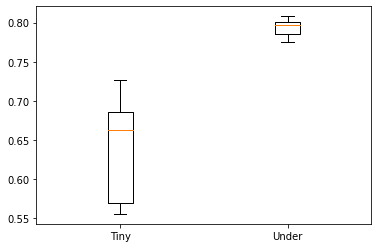

In [58]:
plt.boxplot(data, labels=["Tiny", "Under"])
plt.show()

In [63]:
# Plot entropy across epochs
comp_arrays = [np.array(list(element.values())) for element in undertrain_epochs_comp]
comp_arrays[0].shape

(392702, 3)

In [64]:
comp_entropies = [np.apply_along_axis(entropy, axis=1, arr=array) for array in comp_arrays]
comp_entropies = [np.mean(array) for array in comp_entropies]

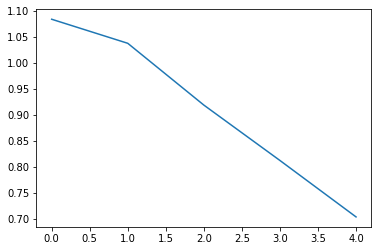

In [65]:
plt.plot(comp_entropies)
plt.show()